In [1]:
### Supress the Warnings so that the same is not shown while result outcomes

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataframe libraries
import numpy as np
import pandas as pd

In [3]:
# Visulisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline 

In [4]:
# StatsModel Library 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# Scikit Library
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [6]:
# Other Misc Libraries
import datetime
from scipy.stats import pearsonr

In [7]:
# Read dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike.shape

(730, 16)

In [9]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
## Checking for null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### There are no missing / Null values either in columns or rows

In [12]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
# Checking for duplicate values
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [14]:
bike.shape

(730, 16)

### duplicate values are not persent

## Data Cleaning

In [15]:
# Column names are bit confusing,hence renaming them for better understanding
bike.rename(columns = {'yr':'year', 'mnth':'months', 'hum':'humidity', 'cnt':'count'}, inplace= 'True')
bike.head()

,instant,dteday,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
# Look for the unwanted columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

### Converting few columns to categorical columns for better readability of the dataset

In [17]:
# Season column conversion to categorical.
bike.season.replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'},inplace=True)
bike.head()

,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# weathersit column conversion to categorical.
bike.weathersit.replace({1:'Pleasant',2:'Moderate',3:'Bad',4:'Severe'},inplace=True)
bike.head()

,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,1,0,6,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,Pleasant,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,Pleasant,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,Pleasant,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
# mnth column conversion to categorical
bike.months.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                   10:'October',11:'November',12:'December'},inplace=True)
bike.head()

,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,January,0,6,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,0,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,1,1,Pleasant,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,2,1,Pleasant,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,3,1,Pleasant,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
# weekday column conversion to categorical
bike.weekday.replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)
bike.head()

,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,January,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Pleasant,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Pleasant,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Pleasant,9.305237,11.46350,43.6957,12.522300,1600


## Data Visualization

### Analyzing Categorical Variables

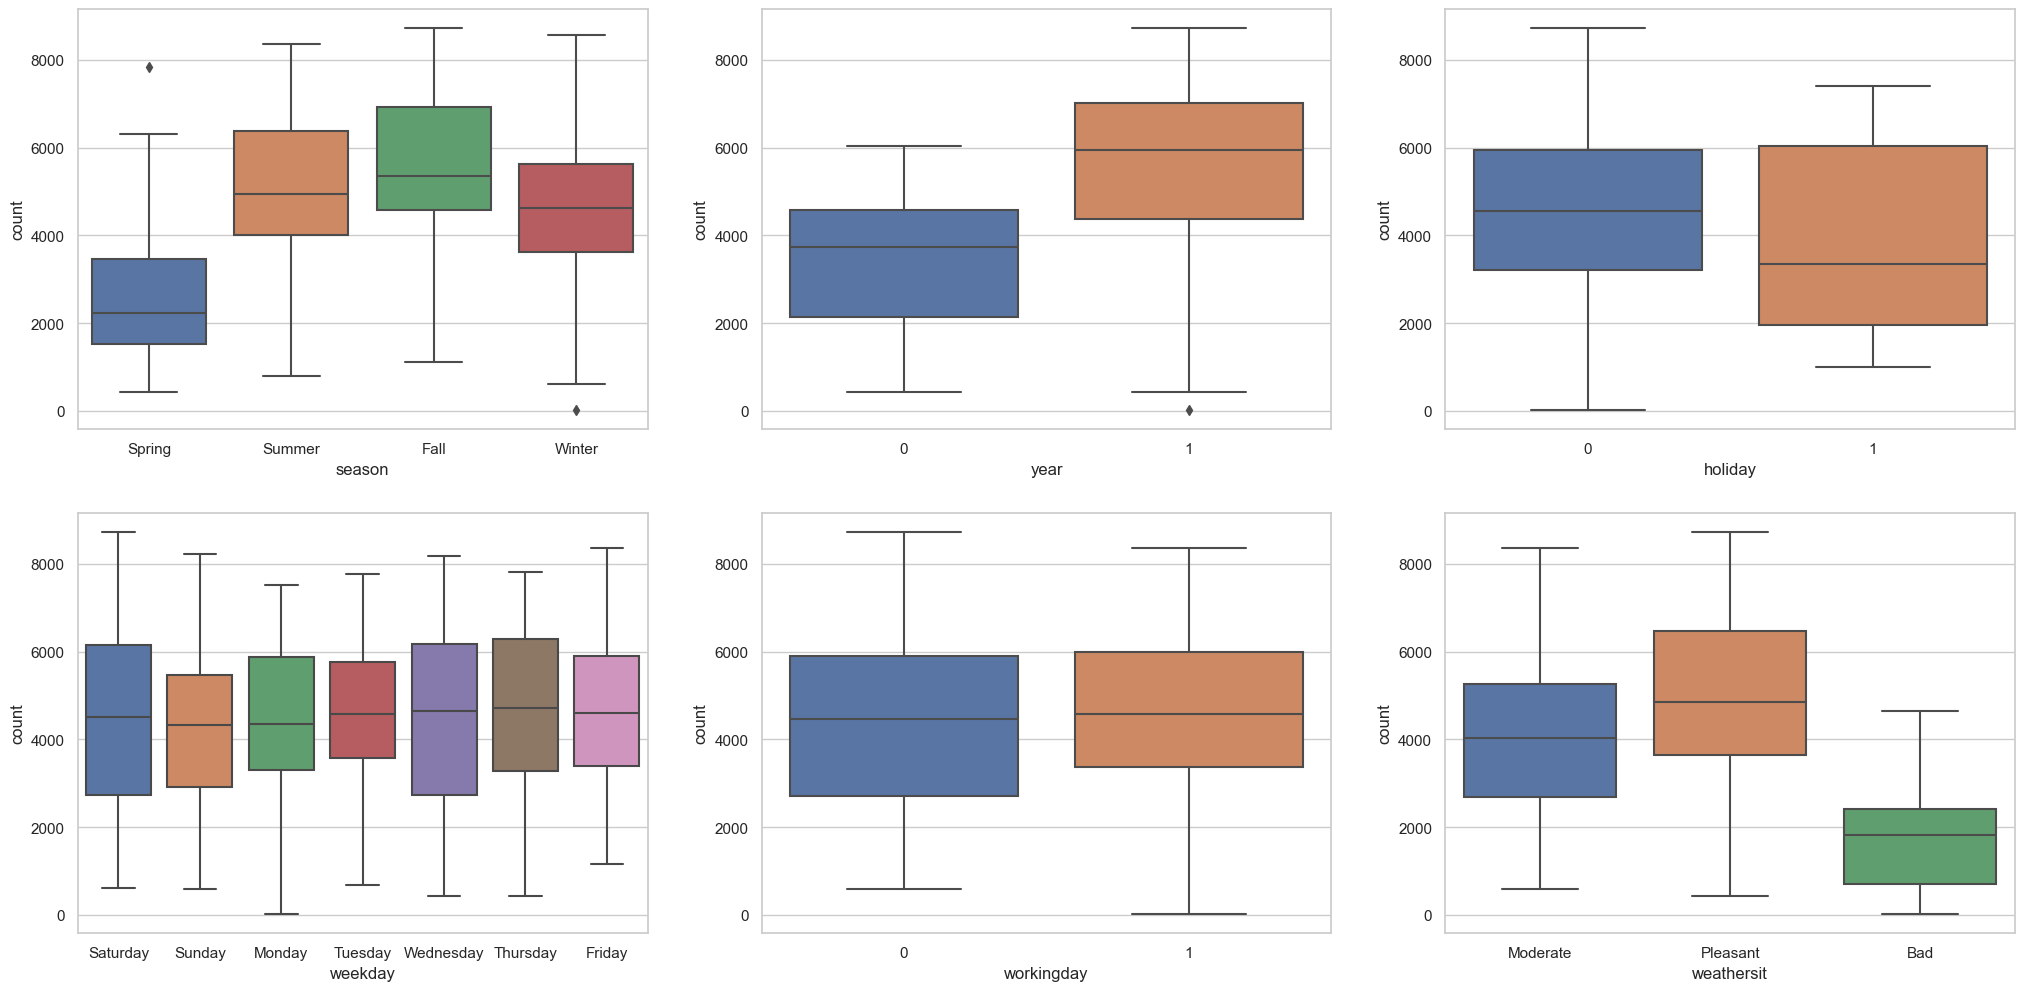

In [21]:
def boxplot_cat_var(cat_var,target):
    plt.figure(figsize=(25, 12))
    for i in range(0,len(cat_var)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x = cat_var[i], y = target, data = bike)
    plt.show()

cat_var =['season','year','holiday','weekday','workingday','weathersit']
boxplot_cat_var(cat_var,'count')

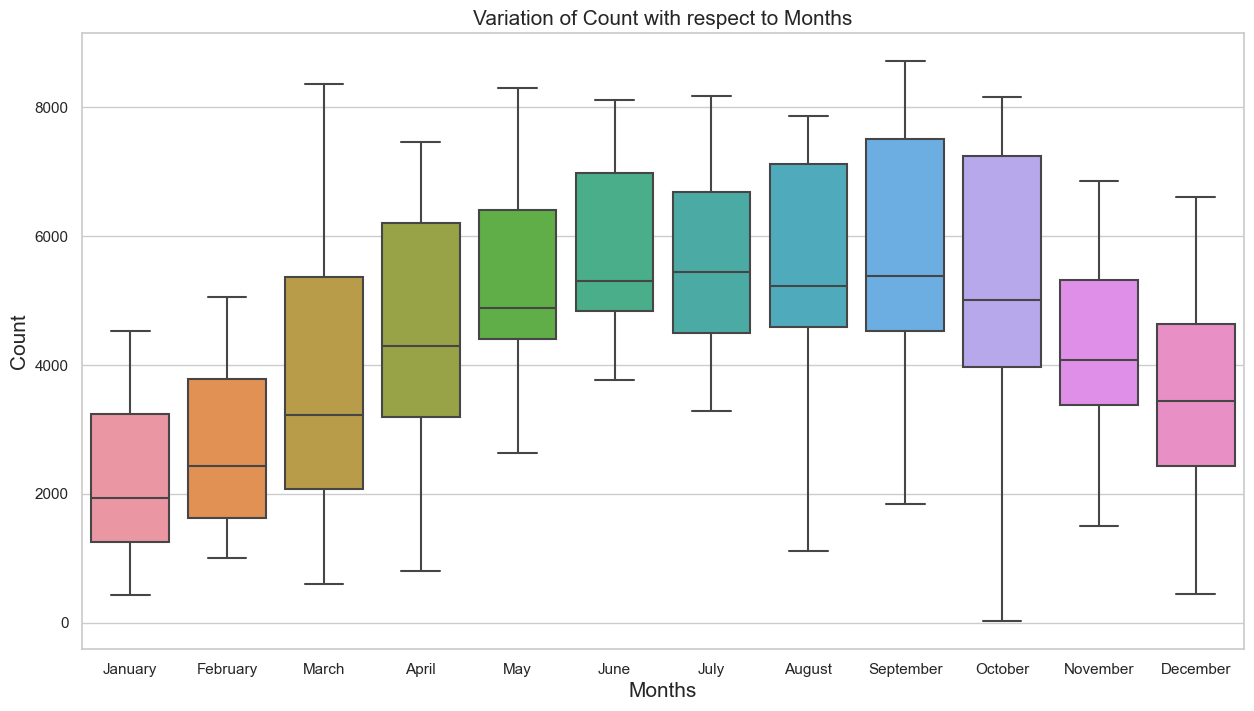

In [22]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'months', y = 'count', data = bike).set_title('Variation of Count with respect to Months', fontsize = 15)
plt.xlabel("Months", fontsize = 15) 
plt.ylabel("Count", fontsize = 15) 
plt.show()

In [23]:
# Create barplot for category columns
# We will have charts on the basis of season, weathersit, month, year, weekday, holiday

def plot_cat_columns(column,x=12,y=6):
    plt.figure(figsize = (x,y))
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='count', data=bike)
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='count', hue='year', data=bike, palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

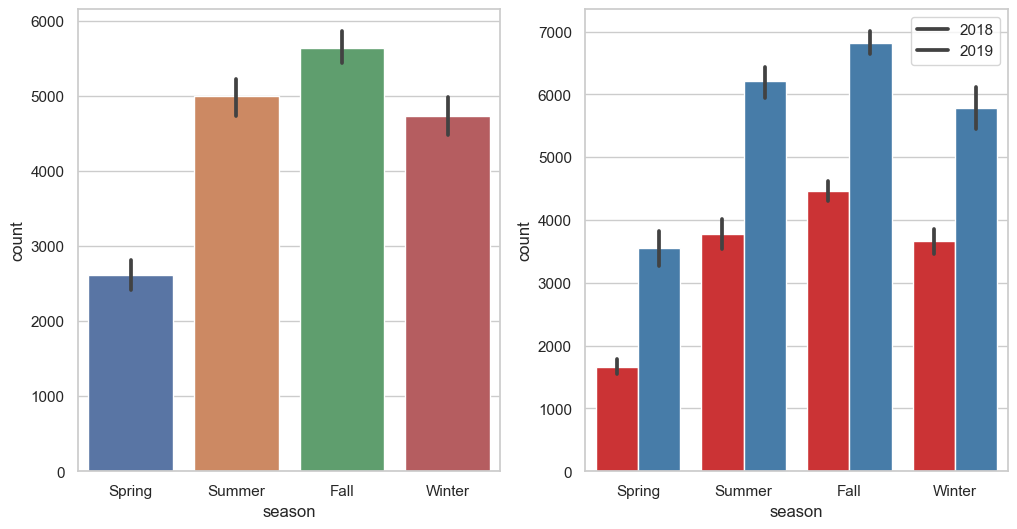

In [24]:
# Chart for season column against the count of bikes

plot_cat_columns('season')

The fall season appears to have garnered greater bookings, with a significant increase observed in the booking count from 2018 to 2019 across all seasons.

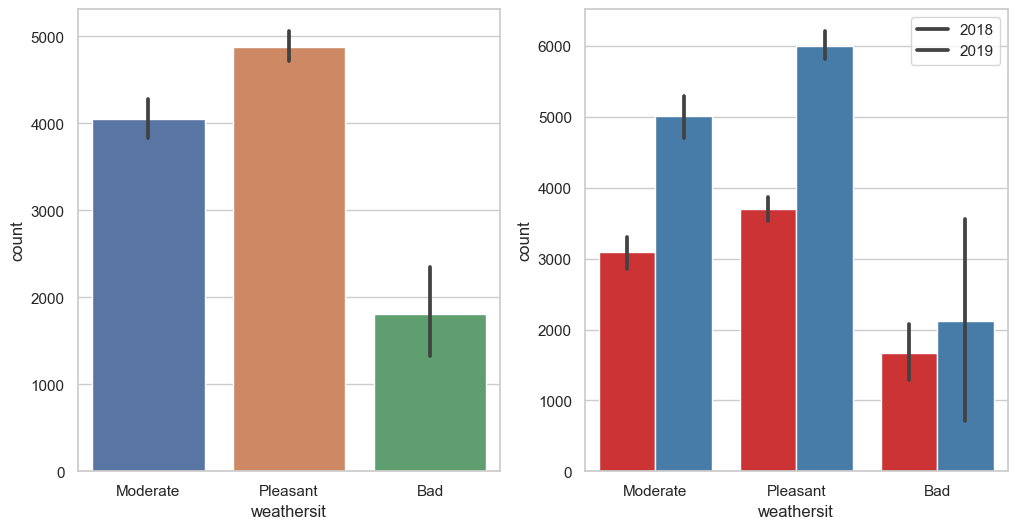

In [25]:
# Chart for weathersit column against the count of bikes

plot_cat_columns('weathersit')

We can see that the Pleasant weathersit has a high increase in number of renting for bike and the reason may be because of the Pleasant weather people came out and travelled and demand for the bikes seems to have increased. Also similar observation that data has increased from 2018 to 2019.

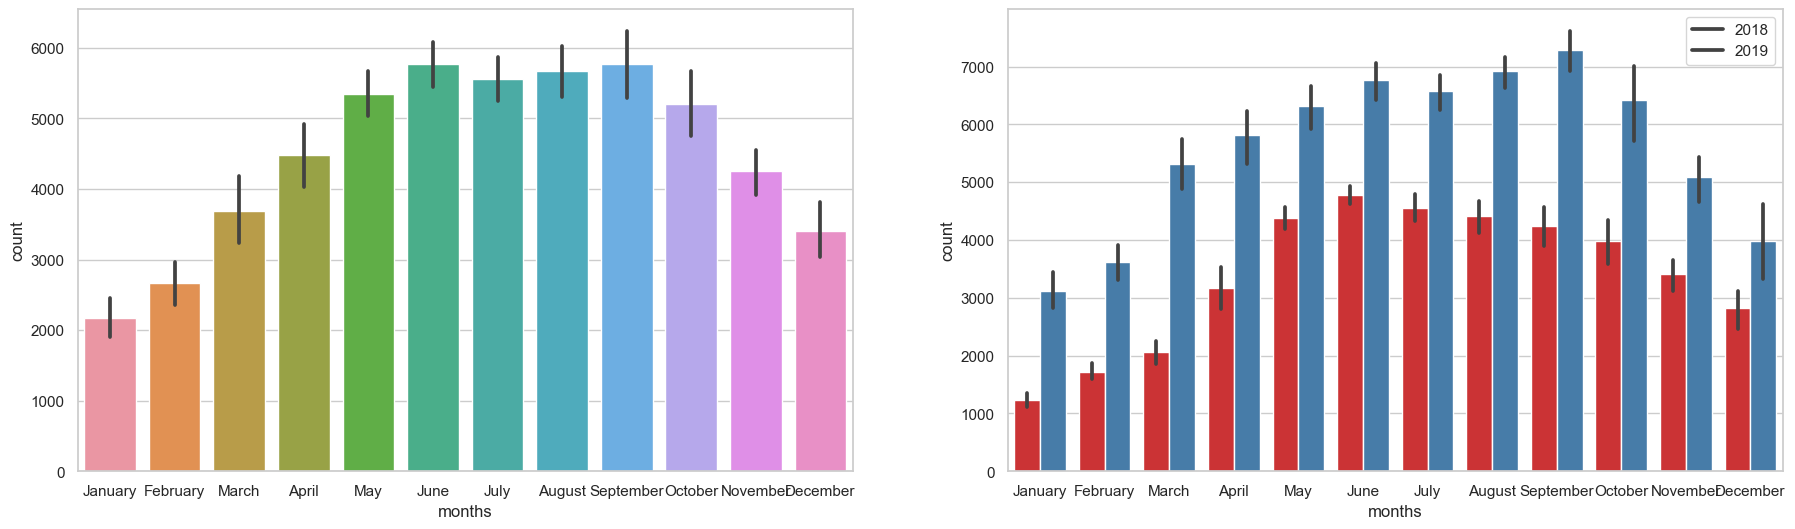

In [26]:
# Chart for month column against the count of bikes

plot_cat_columns('months',22,6)

The majority of the bookings were made during the months of May, June, July, August, September, and October. There was a noticeable upward trend in bookings from the beginning of the year until the middle of the year, followed by a gradual decrease towards the end of the year. Additionally, the number of bookings for each month showed an increase from 2018 to 2019.

The obvious trend is that Pleasant weather attracted more bookings. Furthermore, when comparing to the previous year, i.e., 2018, bookings increased for each weather situation in 2019.

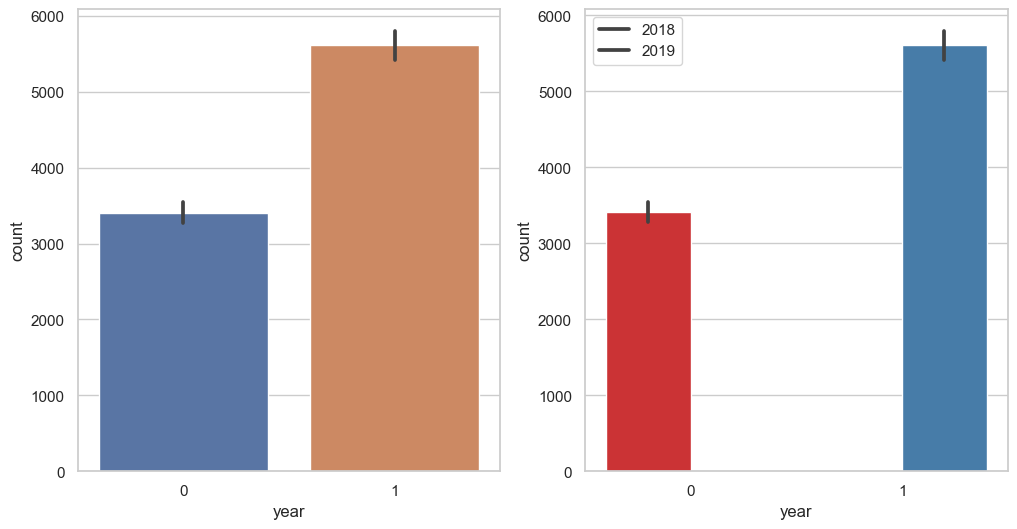

In [27]:
# Chart for year column against the count of bikes

plot_cat_columns('year')

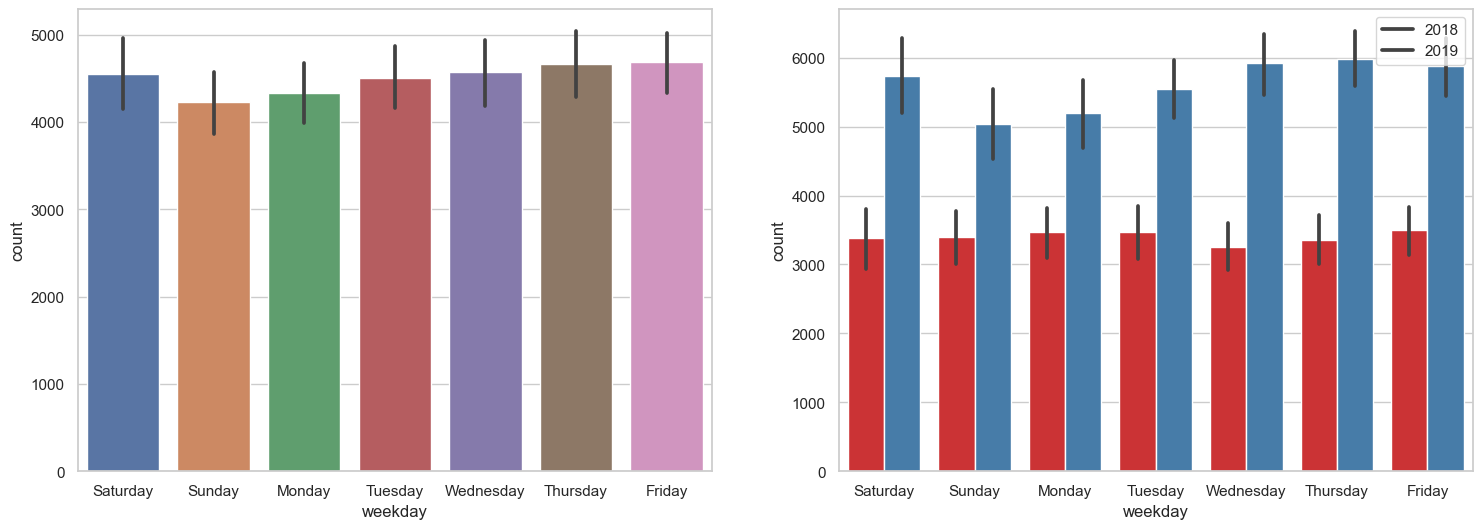

In [28]:
# Chart for weekday column against the count of bikes

plot_cat_columns('weekday', 18, 6)

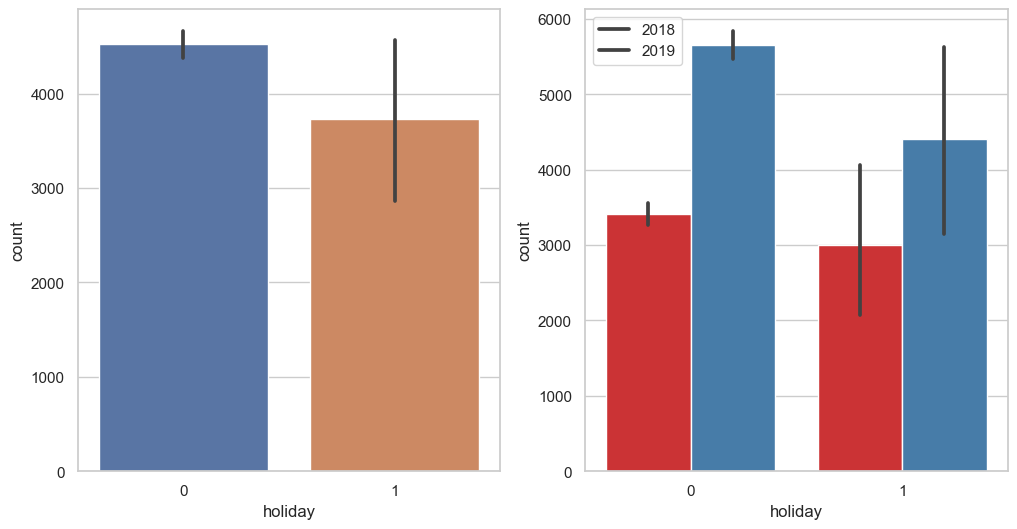

In [29]:
# Chart for holiday column against the count of bikes

plot_cat_columns('holiday')

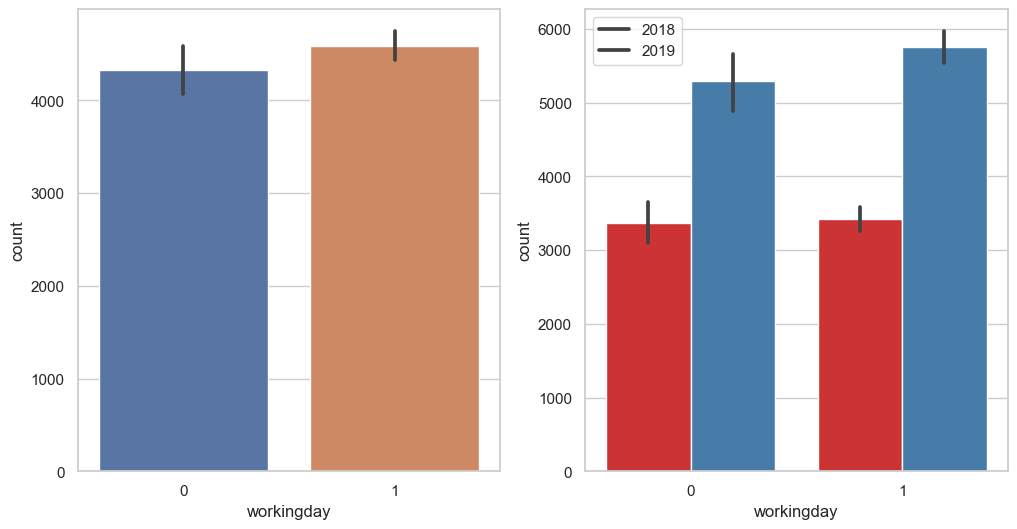

In [30]:
# Chart for workingday column against the count of bikes

plot_cat_columns('workingday')

On non-holiday days, the number of bookings appears to be lower, which is reasonable since people may prefer to spend time at home and enjoy quality time with their families during holidays.

The number of bookings appeared to be nearly the same, whether it was a working day or a non-working day. However, there was an increase in the booking count from 2018 to 2019.

The year 2019 witnessed a higher number of bookings compared to the previous year, indicating positive progress in terms of business.

### Visualising Numeric Variables : Using a pairplot

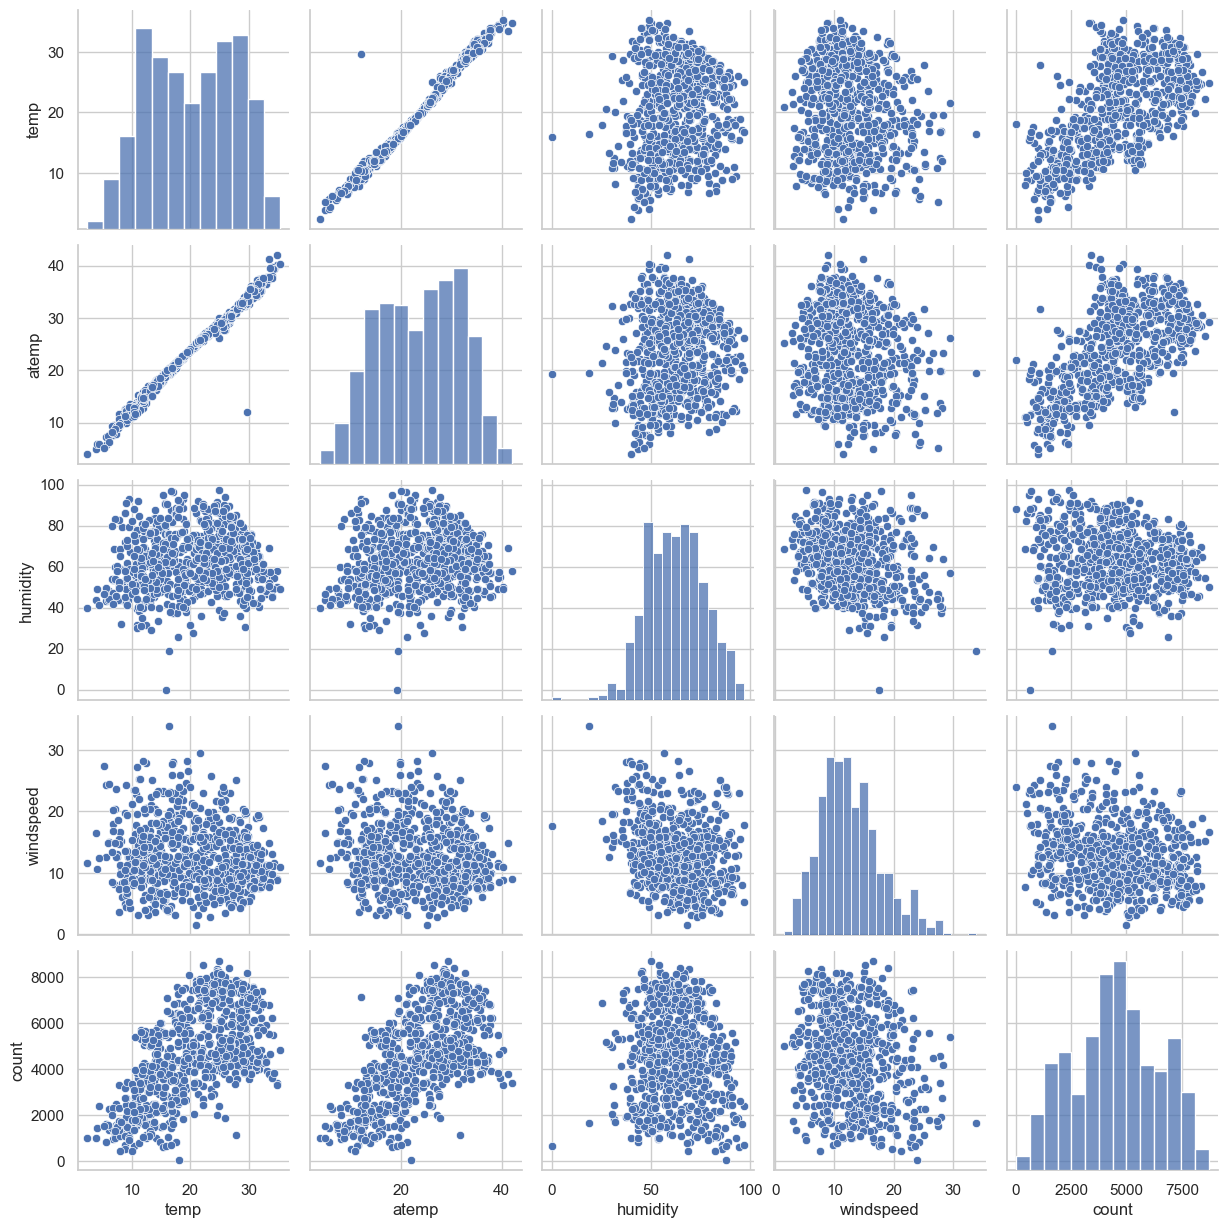

In [31]:
bike_num_vars = bike[['temp','atemp','humidity','windspeed','count']]
sns.pairplot(bike_num_vars)
plt.show()

By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable count .

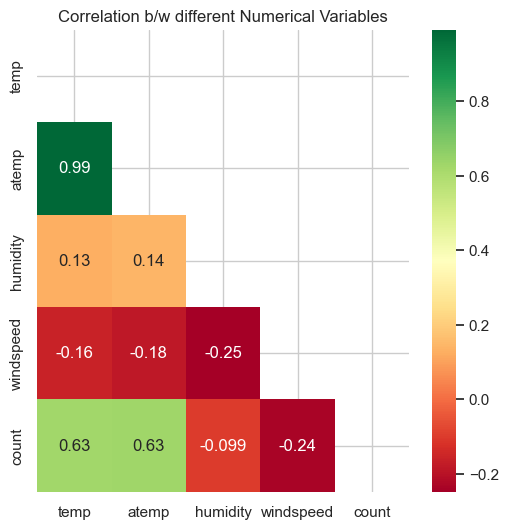

In [32]:
# Checking correlation
plt.figure(figsize = (6,6))

matrix = np.triu(bike_num_vars.corr())
sns.heatmap(bike_num_vars.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation b/w different Numerical Variables")
plt.show()

### Data Preparation

In [33]:
# Create the Dummy variable for month/weekday/weathersit/season.
weathersit_df=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike.season,drop_first=True)
months_df=pd.get_dummies(bike.months,drop_first=True)
weekdays_df=pd.get_dummies(bike.weekday,drop_first=True)

In [34]:
# Merging the dataframe

bike=pd.concat([months_df,weekdays_df,weathersit_df,seasons_df,bike],axis=1)
bike.head()

,August,December,February,January,July,June,March,May,November,October,...,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,January,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,January,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,January,0,Monday,1,Pleasant,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,January,0,Tuesday,1,Pleasant,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,January,0,Wednesday,1,Pleasant,9.305237,11.46350,43.6957,12.522300,1600


In [35]:
### Dropping the unwanted columns

bike.drop(['months', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)
bike.head()

,August,December,February,January,July,June,March,May,November,October,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   August      730 non-null    uint8  
 1   December    730 non-null    uint8  
 2   February    730 non-null    uint8  
 3   January     730 non-null    uint8  
 4   July        730 non-null    uint8  
 5   June        730 non-null    uint8  
 6   March       730 non-null    uint8  
 7   May         730 non-null    uint8  
 8   November    730 non-null    uint8  
 9   October     730 non-null    uint8  
 10  September   730 non-null    uint8  
 11  Monday      730 non-null    uint8  
 12  Saturday    730 non-null    uint8  
 13  Sunday      730 non-null    uint8  
 14  Thursday    730 non-null    uint8  
 15  Tuesday     730 non-null    uint8  
 16  Wednesday   730 non-null    uint8  
 17  Moderate    730 non-null    uint8  
 18  Pleasant    730 non-null    uint8  
 19  Spring      730 non-null    u

In [37]:
# Shape of dataframe

bike.shape

(730, 30)

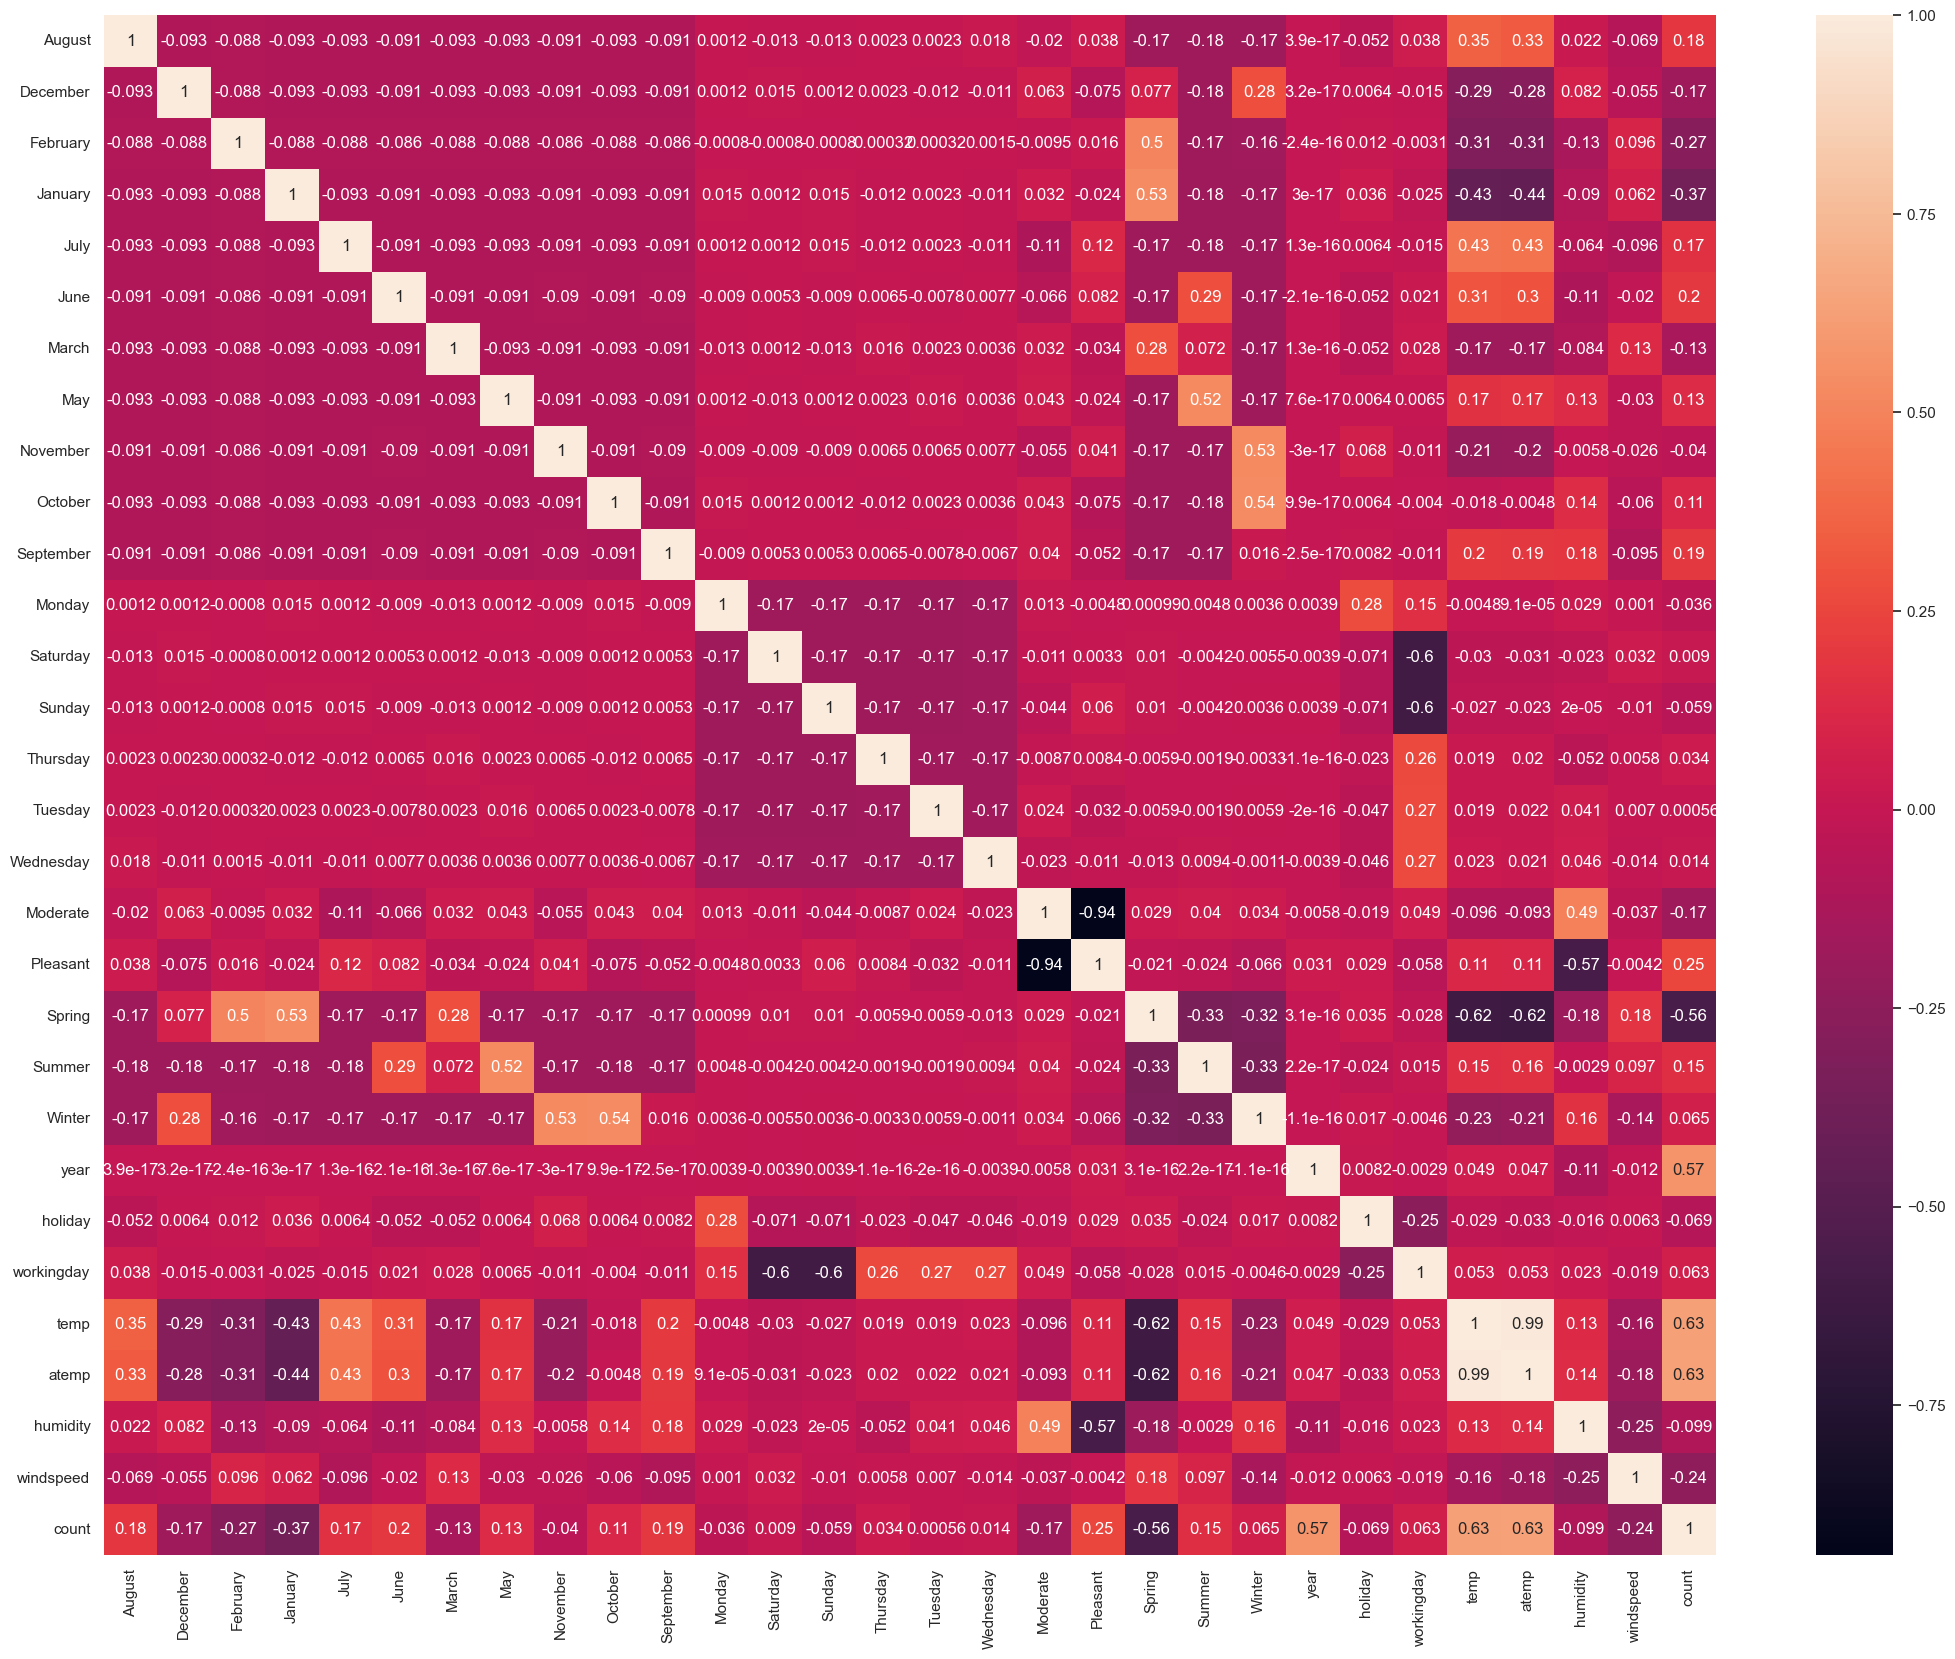

In [38]:
#Calculating Correlation
bike_corr = bike.corr()
plt.figure(figsize=(26, 20))

#Drawing Heatmap of correlation
sns.heatmap(bike_corr,annot=True, )
plt.show()

### Few variables are showing linear relations, so this is a good dataset to form linear regression model.

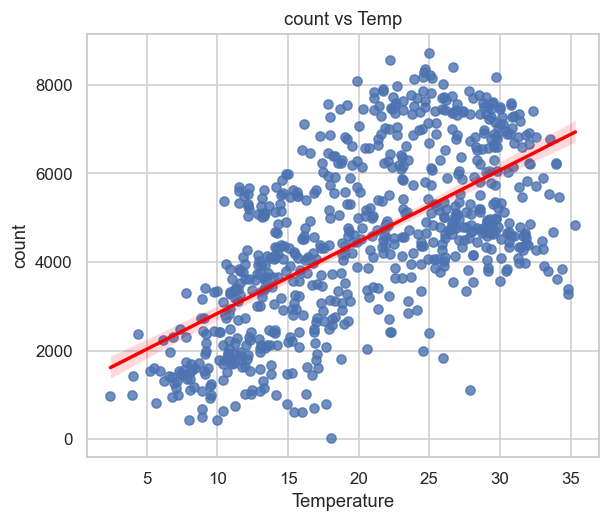

In [39]:
# Checking with regplot the correlation of count vs temp
plt.figure(figsize=(6,5),dpi=110)
plt.title("count vs Temp",fontsize=12)
sns.regplot(data=bike,y="count",x="temp",line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.show()

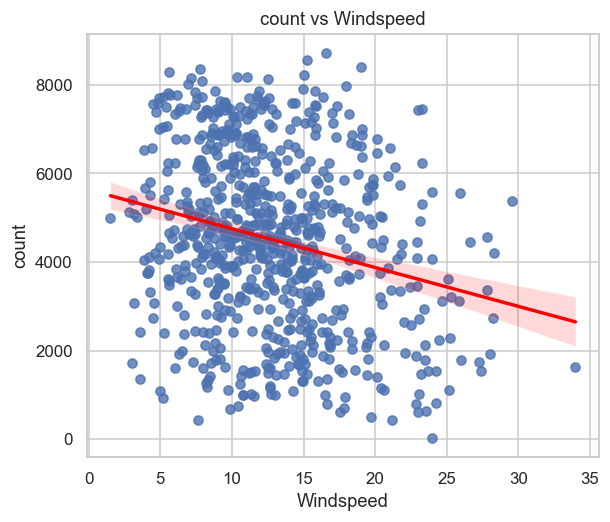

In [40]:
# Checking with regplot the correlation of count vs windspeed
plt.figure(figsize=(6,5),dpi=110)
plt.title("count vs Windspeed",fontsize=12)
sns.regplot(data=bike,y="count",x="windspeed",line_kws={"color": "red"})
plt.xlabel("Windspeed")
plt.show()

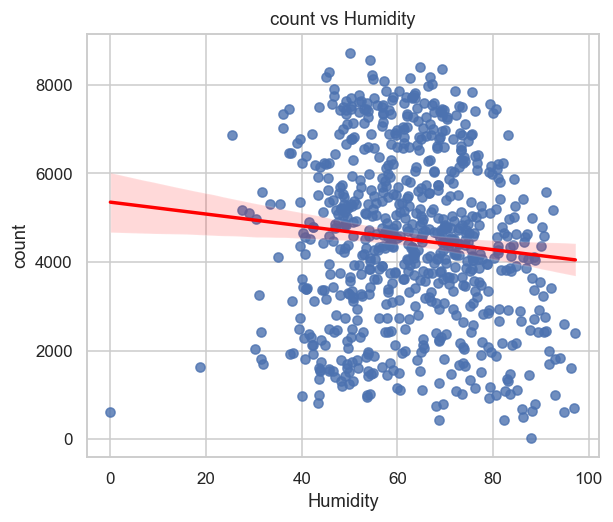

In [41]:
# Checking with regplot the correlation of count vs humidity
plt.figure(figsize=(6,5),dpi=110)
plt.title("count vs Humidity",fontsize=12)
sns.regplot(data=bike,y="count",x="humidity",line_kws={"color": "red"})
plt.xlabel("Humidity")
plt.show()

#### We can see that there is a positive linear relation of bike rental demand(cnt) and temp but it has negative relation with humidity and windspeed

### Partitioning the data into training and testing sets.

In [42]:
# Split the dataframe -- Train/Test 70/30 %

np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [43]:
# Shape of training datatset

bike_train.shape

(510, 30)

In [44]:
# Shape of testing datatset

bike_test.shape

(220, 30)

## Rescaling the bike_train dataframe

* We will be using MinMaxScaler for scaling the dataframe

In [45]:
scaler = MinMaxScaler()

In [46]:
bike_train.head()

,August,December,February,January,July,June,March,May,November,October,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,15.443347,18.8752,48.9583,8.708325,4220
111,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,13.803347,16.0977,72.9583,14.707907,1683


In [47]:
# Appliyng scaler on numerical vars
num_vars = ['temp','humidity','windspeed','count']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [48]:
bike_train[num_vars].head()

,temp,humidity,windspeed,count
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [49]:
bike_train.head()

,August,December,February,January,July,June,March,May,November,October,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.815169,33.1448,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.442393,20.6746,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.245101,11.5850,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,18.8752,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.345824,16.0977,0.751824,0.380981,0.191095


### Linear Model Building

In [50]:
# Building the model

y_train = bike_train.pop('count')
X_train = bike_train

In [51]:
X_train

,August,December,February,January,July,June,March,May,November,October,...,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,33.14480,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,20.67460,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,11.58500,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,18.87520,0.504508,0.188475
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,16.09770,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.863973,35.35440,0.679690,0.187140
53,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0.202618,12.28585,0.435939,0.111379
350,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.248216,12.46855,0.577930,0.431816
79,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0.462664,20.48675,0.759870,0.529881


### Recursive Feature Elimination:

In [52]:
# We have already imported the required libraries
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
#rfe = RFE(lm, 20)             
rfe = RFE(estimator=lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('August', False, 3),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 8),
 ('March', False, 7),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 2),
 ('September', True, 1),
 ('Monday', False, 5),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 6),
 ('Tuesday', False, 4),
 ('Wednesday', False, 9),
 ('Moderate', True, 1),
 ('Pleasant', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [54]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['December', 'February', 'January', 'July', 'May', 'November',
       'September', 'Saturday', 'Sunday', 'Moderate', 'Pleasant', 'Spring',
       'Summer', 'Winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [55]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['August', 'June', 'March', 'October', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday', 'atemp'],
      dtype='object')

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Manual Model Development using statsmodel

In [57]:
# Dataframe with RFE for the selected variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [58]:
# Function to calculate VIF(Variance Inflation Factor)
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif  

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
9,Sunday,inf
8,Saturday,inf
16,holiday,inf
17,workingday,inf
11,Pleasant,10.47
10,Moderate,9.00
12,Spring,5.79
18,temp,4.88
14,Winter,3.88
13,Summer,3.49


### MODEL 1

In [60]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          5.20e-189
Time:                        23:49:57   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0435      0.039      1.114      0.2

### MODEL 2

In [61]:
# M2
X_train_new = X_train_rfe.drop(['Sunday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,161.84
10,Pleasant,10.47
9,Moderate,9.00
11,Spring,5.79
17,temp,4.88
13,Winter,3.88
12,Summer,3.49
3,January,2.38
18,humidity,1.97
16,workingday,1.88


In [62]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          5.20e-189
Time:                        23:49:57   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0421      0.050      0.848      0.3

### MODEL 3

In [63]:
# M3
X_train_new = X_train_lm1.drop(['Saturday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,154.43
9,Pleasant,10.42
8,Moderate,8.99
10,Spring,5.79
16,temp,4.88
12,Winter,3.88
11,Summer,3.49
3,January,2.38
17,humidity,1.96
2,February,1.87


In [64]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.3
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          4.46e-187
Time:                        23:49:57   Log-Likelihood:                 518.09
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     491   BIC:                            -917.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0822      0.049      1.672      0.0

### MODEL 4

In [65]:
# M4
X_train_new = X_train_lm1.drop(['workingday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,151.07
9,Pleasant,10.40
8,Moderate,8.98
10,Spring,5.79
15,temp,4.88
12,Winter,3.87
11,Summer,3.49
3,January,2.38
16,humidity,1.96
2,February,1.87


In [66]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.3
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          1.73e-187
Time:                        23:49:57   Log-Likelihood:                 516.41
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     492   BIC:                            -920.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0952      0.049      1.955      0.0

### MODEL 5

In [67]:
# M5
X_train_new = X_train_lm1.drop(['February'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,148.23
8,Pleasant,10.39
7,Moderate,8.98
9,Spring,5.39
14,temp,4.55
11,Winter,3.86
10,Summer,3.42
15,humidity,1.95
5,November,1.78
2,January,1.68


In [68]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.5
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          5.48e-188
Time:                        23:49:57   Log-Likelihood:                 514.92
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     493   BIC:                            -923.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0839      0.048      1.735      0.0

### MODEL 6

In [69]:
# M6
X_train_new = X_train_lm1.drop(['November'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,145.67
7,Pleasant,10.34
6,Moderate,8.95
8,Spring,5.20
13,temp,4.25
10,Winter,3.63
9,Summer,3.31
14,humidity,1.95
2,January,1.65
4,May,1.50


In [70]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.1
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          3.78e-188
Time:                        23:49:57   Log-Likelihood:                 512.59
No. Observations:                 510   AIC:                            -993.2
Df Residuals:                     494   BIC:                            -925.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0704      0.048      1.463      0.1

### MODEL 7

In [71]:
# M7
X_train_new = X_train_lm1.drop(['December'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,145.01
6,Pleasant,10.25
5,Moderate,8.90
7,Spring,5.18
12,temp,3.99
9,Winter,3.63
8,Summer,3.26
13,humidity,1.93
1,January,1.57
3,May,1.50


In [72]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.4
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          6.51e-189
Time:                        23:49:57   Log-Likelihood:                 511.68
No. Observations:                 510   AIC:                            -993.4
Df Residuals:                     495   BIC:                            -929.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0660      0.048      1.375      0.1

### MODEL 8

In [73]:
# M8
X_train_new = X_train_lm1.drop(['January'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,143.33
5,Pleasant,10.23
4,Moderate,8.88
6,Spring,5.12
11,temp,3.71
8,Winter,3.52
7,Summer,3.23
12,humidity,1.93
2,May,1.50
1,July,1.48


In [74]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.7
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          2.78e-189
Time:                        23:49:57   Log-Likelihood:                 509.79
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     496   BIC:                            -932.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0561      0.048      1.172      0.2

### MODEL 9

In [75]:
# M9
X_train_new = X_train_lm1.drop(['Spring'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,116.26
5,Pleasant,10.19
4,Moderate,8.87
11,humidity,1.91
6,Summer,1.70
10,temp,1.61
2,May,1.47
1,July,1.43
7,Winter,1.29
3,September,1.19


In [76]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          9.19e-189
Time:                        23:49:57   Log-Likelihood:                 505.75
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     497   BIC:                            -930.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.043     -0.055      0.9

In [77]:
# Checking the parameters obtained
lr1.params

const       -0.002395
July        -0.047343
May          0.010151
September    0.096712
Moderate     0.180705
Pleasant     0.230714
Summer       0.078256
Winter       0.134849
year         0.228146
holiday     -0.098759
temp         0.596742
humidity    -0.187383
windspeed   -0.188866
dtype: float64

### Work on the Residual Analysis of the train data

In [78]:
X_train_lm1

,const,July,May,September,Moderate,Pleasant,Summer,Winter,year,holiday,temp,humidity,windspeed
576,1.0,1,0,0,0,1,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,0,0,0,1,0,0,0,1,0,0.442393,0.640189,0.255342
728,1.0,0,0,0,0,1,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,0,0,0,1,0,1,0,1,0,0.395666,0.504508,0.188475
111,1.0,0,0,0,1,0,1,0,0,0,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,1,0,0,1,0,0.863973,0.679690,0.187140
53,1.0,0,0,0,0,1,0,0,0,0,0.202618,0.435939,0.111379
350,1.0,0,0,0,1,0,0,1,0,0,0.248216,0.577930,0.431816
79,1.0,0,0,0,1,0,1,0,0,0,0.462664,0.759870,0.529881


In [79]:
y_train_pred = lr1.predict(X_train_lm1)

Text(0.5, 0, 'Errors')

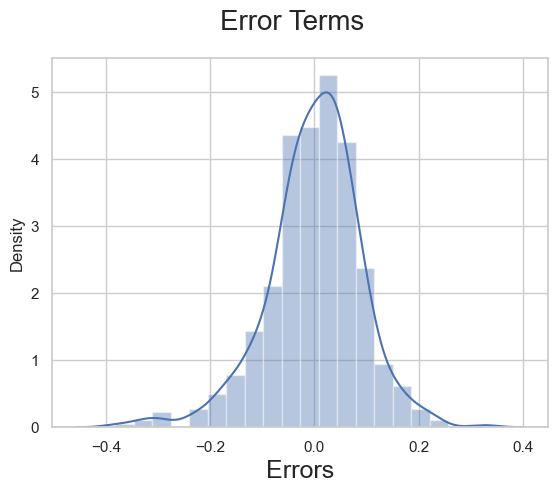

In [80]:
# Histogram of error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Seems like a normal distribution and proper parabola is formed with no high or long tails.

In [81]:
calculateVIF(X_train_new)

,Features,VIF
0,const,116.26
5,Pleasant,10.19
4,Moderate,8.87
11,humidity,1.91
6,Summer,1.70
10,temp,1.61
2,May,1.47
1,July,1.43
7,Winter,1.29
3,September,1.19


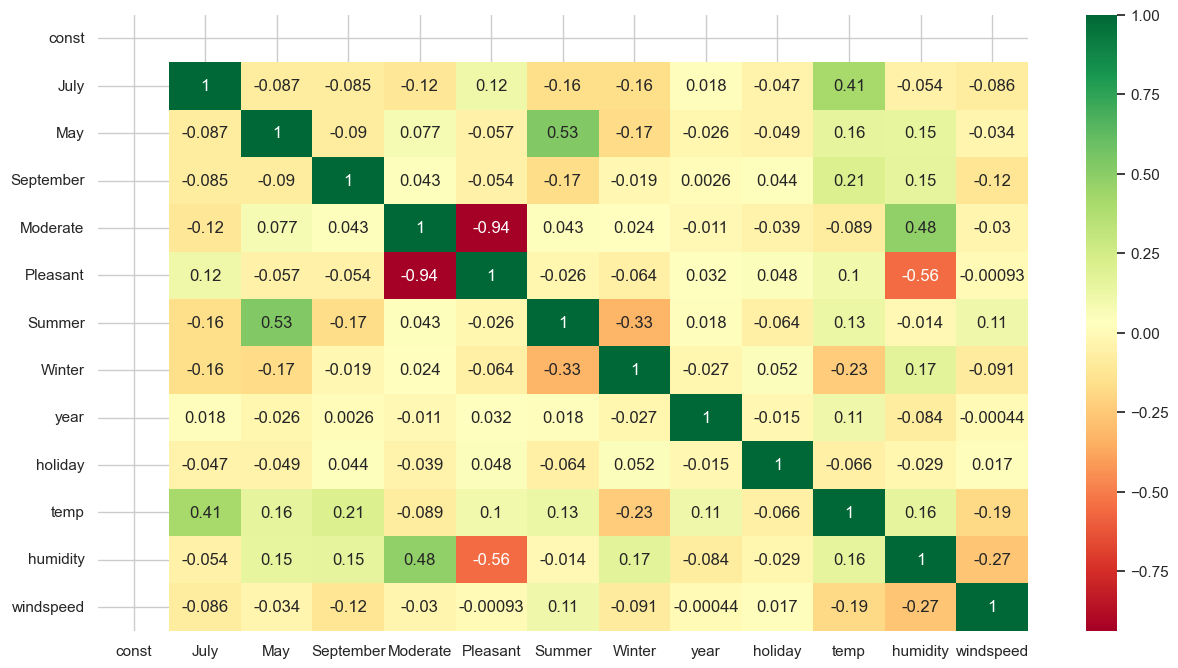

In [82]:
# Now create a heatmap to understand the collinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

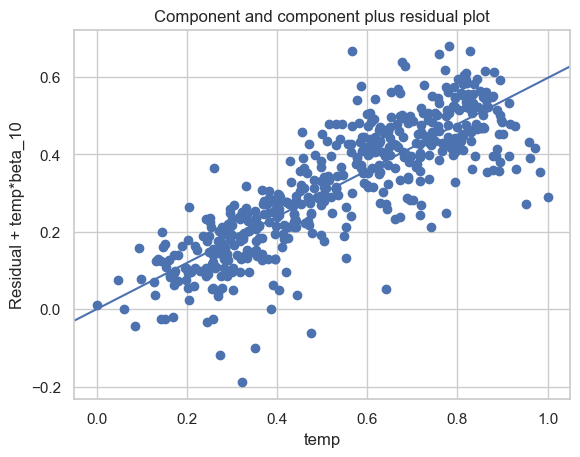

In [83]:
# Check the Linear relationship with CCPR plot

# temp variable
sm.graphics.plot_ccpr(lr1, 'temp')
plt.show()

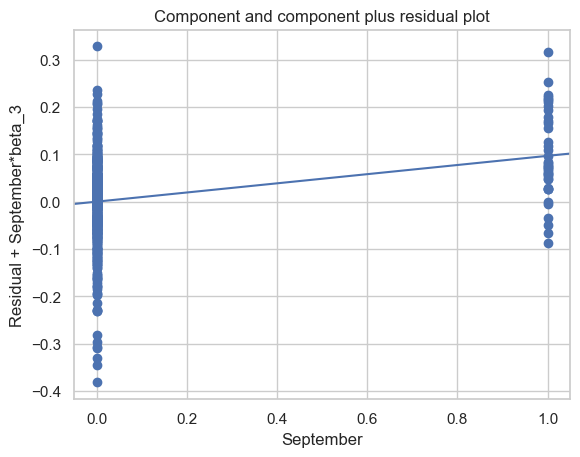

In [84]:
# sep variable
sm.graphics.plot_ccpr(lr1, 'September')
plt.show()

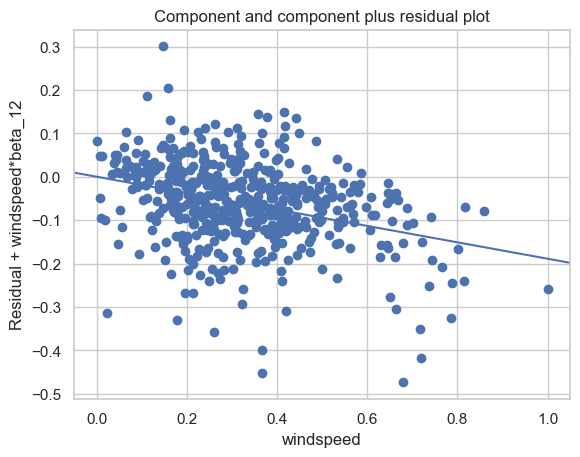

In [85]:
# windspeed variable
sm.graphics.plot_ccpr(lr1, 'windspeed')
plt.show()

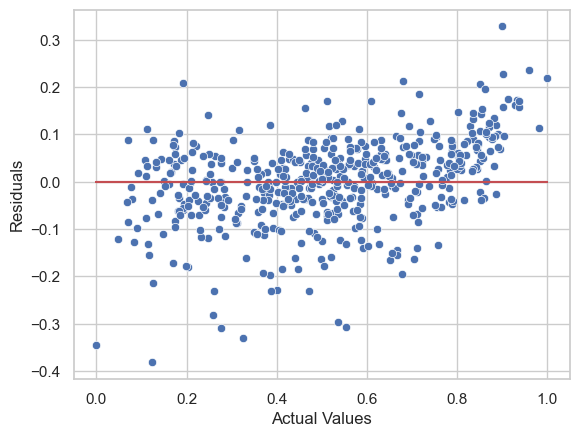

In [86]:
y_train_pred = lr1.predict(X_train_lm1)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)

# Plot a horizontal line at y=0 to represent the 'perfect prediction' line
plt.plot(y_train, (y_train - y_train), '-r')

# Label the axes
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

We cannot see residuals from the plot above.

### FINAL Predictions Using the Model

In [87]:
# Apply scaling for test dataset which we took 30% bike_test

num_vars = ['temp', 'humidity', 'windspeed','count']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,August,December,February,January,July,June,March,May,November,October,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0.831783,33.27085,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0.901354,36.04875,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0.511964,22.85230,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,34.24915,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0.817246,32.19710,0.314298,0.537414,0.569029


In [88]:
bike_test.describe()

,August,December,February,January,July,June,March,May,November,October,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,24.250312,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,8.281075,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,4.941955,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,17.090025,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,24.700000,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,31.124313,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,41.318550,1.002146,0.807474,0.963300


In [89]:
y_test = bike_test.pop('count')
X_test = bike_test

In [90]:
X_test.columns

Index(['August', 'December', 'February', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Moderate', 'Pleasant',
       'Spring', 'Summer', 'Winter', 'year', 'holiday', 'workingday', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [91]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm1 = sm.add_constant(X_test)

KeyError: "['const'] not in index"